https://datahub.io/core/glacier-mass-balance#pandas

Explain:

This is cumulative change in mass balance of a set of “reference” glaciers worldwide beginning in 1945. The values represents the average of all the glaciers that were measured. Negative values indicate a net loss of ice and snow compared with the base year of 1945. For consistency, measurements are in meters of water equivalent, which represent changes in the average thickness of a glacier.


In [45]:
import datapackage
import pandas as pd

data_url = 'https://datahub.io/core/glacier-mass-balance/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
glacier_df = None
for resource in resources:
    if resource.tabular:
        glacier_df = pd.read_csv(resource.descriptor['path'])
        # update negative number to be positive number
        glacier_df['Mean cumulative mass balance'] = -1*glacier_df['Mean cumulative mass balance']
        glacier_df.rename(columns = {'Mean cumulative mass balance':'Mean decrease mass balance'}, inplace = True)
        print (glacier_df)

    Year  Mean decrease mass balance  Number of observations
0   1945                      -0.000                     NaN
1   1946                       1.130                     1.0
2   1947                       3.190                     1.0
3   1948                       3.190                     1.0
4   1949                       3.820                     3.0
..   ...                         ...                     ...
65  2010                      25.158                    37.0
66  2011                      26.294                    37.0
67  2012                      26.930                    36.0
68  2013                      27.817                    31.0
69  2014                      28.652                    24.0

[70 rows x 3 columns]
    Year  Mean decrease mass balance  Number of observations
0   1945                      -0.000                     NaN
1   1946                       1.130                     1.0
2   1947                       3.190                     1.0
3

In [4]:
# Correlation between average temperature vs glacier mean cumulative mass balance


In [5]:
# Read temperature data
temp_df = pd.read_csv("../Data/OriginalData/observed.csv")


In [6]:
merged = pd.merge(temp_df, glacier_df, how='inner', on='Year')
merged.rename(columns = {'Annual_Mean':'temp_annual_mean', '5-year_Mean':'temp_5_year_mean', 'Mean decrease mass balance': 'glacier_mean_decrease_mass_balance', 'Number of observations': 'glacier_number_of_observations'}, inplace = True)
print(merged)

    Year  temp_annual_mean  temp_5_year_mean  \
0   1945              0.00              0.01   
1   1946             -0.08             -0.02   
2   1947             -0.05             -0.07   
3   1948             -0.11             -0.11   
4   1949             -0.12             -0.10   
..   ...               ...               ...   
65  2010              0.66              0.57   
66  2011              0.55              0.59   
67  2012              0.57              0.61   
68  2013              0.60               NaN   
69  2014              0.67               NaN   

    glacier_mean_decrease_mass_balance  glacier_number_of_observations  
0                               -0.000                             NaN  
1                                1.130                             1.0  
2                                3.190                             1.0  
3                                3.190                             1.0  
4                                3.820                    

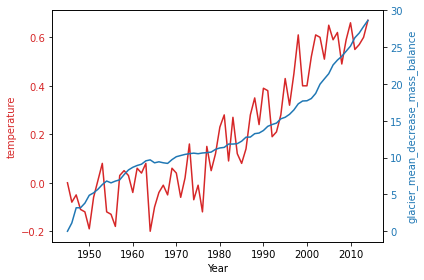

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# ax.plot(merged['Year'], merged['Annual_Mean'] , label='temperature')
# ax.plot(merged['Year'], merged['Mean cumulative mass balance'] , label='glacier_cummulative_mass_balance') 

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('temperature', color=color)
ax1.plot(merged['Year'], merged['temp_annual_mean'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('glacier_mean_decrease_mass_balance', color=color)  # we already handled the x-label with ax1
ax2.plot(merged['Year'], merged['glacier_mean_decrease_mass_balance'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [41]:
# merge data set with co2
co2_df = pd.read_csv("../Data/VisualizationData/CO2_GDP/co2emission-temperature.csv")
co2_df['Year'] = co2_df.apply(lambda x: int(x['year']), axis=1)
co2_df = co2_df.drop(columns=['Unnamed: 0', 'year', 'temperature anomaly', 'co2_global_emission_x', 'co2_global_emission_y'])
co2_df.rename(columns = {'global co2 emission':'co2_global_emission'}, inplace = True)
merged = pd.merge(merged, co2_df, how='inner', on='Year')
print(merged)

    Year  temp_annual_mean  temp_5_year_mean  \
0   1945              0.00              0.01   
1   1946             -0.08             -0.02   
2   1947             -0.05             -0.07   
3   1948             -0.11             -0.11   
4   1949             -0.12             -0.10   
..   ...               ...               ...   
65  2010              0.66              0.57   
66  2011              0.55              0.59   
67  2012              0.57              0.61   
68  2013              0.60               NaN   
69  2014              0.67               NaN   

    glacier_mean_decrease_mass_balance  glacier_number_of_observations  \
0                               -0.000                             NaN   
1                                1.130                             1.0   
2                                3.190                             1.0   
3                                3.190                             1.0   
4                                3.820               

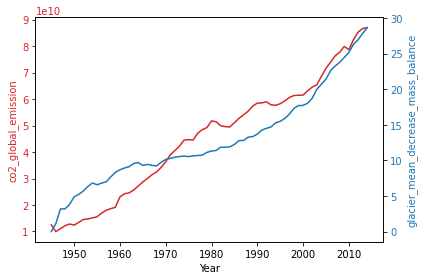

In [42]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('co2_global_emission', color=color)
ax1.plot(merged['Year'], merged['co2_global_emission'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('glacier_mean_decrease_mass_balance', color=color)  # we already handled the x-label with ax1
ax2.plot(merged['Year'], merged['glacier_mean_decrease_mass_balance'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [52]:
sea_level_df = pd.read_csv("./epa-sea-level_csv.csv")
sea_level_df.rename(columns = {'CSIRO Adjusted Sea Level':'csiro_adjusted_sea_level'}, inplace = True)
sea_level_df.drop(columns=['Lower Error Bound', 'Upper Error Bound', 'NOAA Adjusted Sea Level'])
sea_level_df['Year'] = sea_level_df.apply(lambda x: int(x['Year'][:4]), axis=1)

merged = pd.merge(merged, sea_level_df, how='inner', on='Year')
print(merged)



    Year  temp_annual_mean  temp_5_year_mean  \
0   1945              0.00              0.01   
1   1946             -0.08             -0.02   
2   1947             -0.05             -0.07   
3   1948             -0.11             -0.11   
4   1949             -0.12             -0.10   
..   ...               ...               ...   
65  2010              0.66              0.57   
66  2011              0.55              0.59   
67  2012              0.57              0.61   
68  2013              0.60               NaN   
69  2014              0.67               NaN   

    glacier_mean_decrease_mass_balance  glacier_number_of_observations  \
0                               -0.000                             NaN   
1                                1.130                             1.0   
2                                3.190                             1.0   
3                                3.190                             1.0   
4                                3.820               